Tarea N°3 Ignacio Molina, junto con la colaboracion de Camilo Casanova, Jorge Farias y Nicolas Guede.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [108]:
data = pd.read_csv("2020_CL_Region_Mobility_Report.csv",sep=",")
data2 = pd.read_csv("2021_CL_Region_Mobility_Report.csv",sep=",")
data3 = pd.read_csv("applemobilitytrends-2021-12-08.csv",sep=",")
##leo dataframe cuarentenas

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [57]:
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
1,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
2,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
3,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
4,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22418,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-27,-80.0,-51.0,-81.0,-66.0,-31.0,20.0
22419,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-28,-33.0,-4.0,-47.0,-27.0,-19.0,10.0
22420,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-29,-35.0,0.0,-45.0,-25.0,-21.0,11.0
22421,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2020-12-30,-33.0,9.0,-38.0,-17.0,-19.0,11.0


In [58]:
dataRM = data[data['sub_region_1'] == 'Santiago Metropolitan Region']
dataRM

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
16408,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
16409,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
16410,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
16411,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
16412,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18650,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2020-12-27,-49.0,-30.0,-54.0,-75.0,-13.0,18.0
18651,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2020-12-28,-2.0,8.0,-9.0,-14.0,-10.0,10.0
18652,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2020-12-29,1.0,18.0,-12.0,-14.0,-11.0,10.0
18653,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2020-12-30,5.0,24.0,-11.0,5.0,-10.0,10.0


In [59]:
dataRM = dataRM.drop(["metro_area","iso_3166_2_code","census_fips_code","place_id",
                      "retail_and_recreation_percent_change_from_baseline",
                      "grocery_and_pharmacy_percent_change_from_baseline",
                      "transit_stations_percent_change_from_baseline",
                      "workplaces_percent_change_from_baseline",
                      "residential_percent_change_from_baseline"], axis=1)

In [60]:
dataRM

,country_region_code,country_region,sub_region_1,sub_region_2,date,parks_percent_change_from_baseline
16408,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-15,-9.0
16409,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-16,-12.0
16410,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-17,-10.0
16411,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-18,-10.0
16412,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-19,-10.0
...,...,...,...,...,...,...
18650,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-27,-54.0
18651,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-28,-9.0
18652,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-29,-12.0
18653,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-30,-11.0


In [35]:
dataRM2 = dataRM.sort_values(by="parks_percent_change_from_baseline")

In [37]:
dataRM2.info

<bound method DataFrame.info of       country_region_code country_region                  sub_region_1  \
18148                  CL          Chile  Santiago Metropolitan Region   
17827                  CL          Chile  Santiago Metropolitan Region   
16543                  CL          Chile  Santiago Metropolitan Region   
17812                  CL          Chile  Santiago Metropolitan Region   
17190                  CL          Chile  Santiago Metropolitan Region   
...                   ...            ...                           ...   
16933                  CL          Chile  Santiago Metropolitan Region   
16934                  CL          Chile  Santiago Metropolitan Region   
16935                  CL          Chile  Santiago Metropolitan Region   
16936                  CL          Chile  Santiago Metropolitan Region   
16937                  CL          Chile  Santiago Metropolitan Region   

              sub_region_2        date  parks_percent_change_from_baseline  
18

In [38]:
dataRM2 = dataRM2.dropna(subset=["parks_percent_change_from_baseline"])

In [39]:
dataRM2

,country_region_code,country_region,sub_region_1,sub_region_2,date,parks_percent_change_from_baseline
18148,CL,Chile,Santiago Metropolitan Region,Santiago Province,2020-06-29,-86.0
17827,CL,Chile,Santiago Metropolitan Region,Melipilla Province,2020-06-29,-84.0
16543,CL,Chile,Santiago Metropolitan Region,NaN,2020-06-29,-84.0
17812,CL,Chile,Santiago Metropolitan Region,Melipilla Province,2020-06-14,-83.0
17190,CL,Chile,Santiago Metropolitan Region,Cordillera Province,2020-07-04,-83.0
...,...,...,...,...,...,...
17049,CL,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-12-31,68.0
17039,CL,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-12-21,74.0
17041,CL,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-12-23,82.0
17040,CL,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-12-22,82.0


<AxesSubplot:xlabel='date', ylabel='parks_percent_change_from_baseline'>

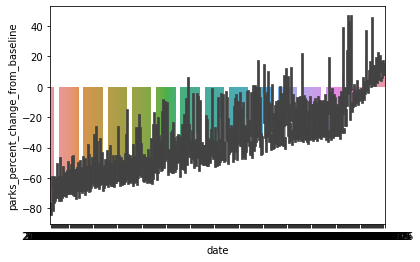

In [40]:
sns.barplot(x = "date", y = "parks_percent_change_from_baseline", data=dataRM2)

<AxesSubplot:xlabel='date', ylabel='parks_percent_change_from_baseline'>

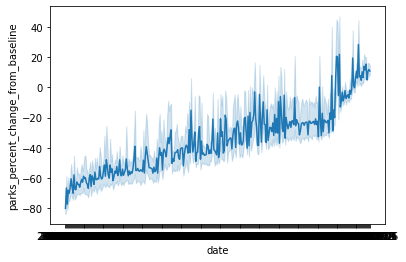

In [42]:
sns.lineplot(x='date', y='parks_percent_change_from_baseline', data=dataRM2)

In [43]:
#12 de junio 2021 RM fase 1 - 24 de junio
#27 de marzo 2021 RM fase 1 - 
dataRM = dataRM.dropna(subset=["parks_percent_change_from_baseline"])

In [44]:
dataRM

,country_region_code,country_region,sub_region_1,sub_region_2,date,parks_percent_change_from_baseline
16408,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-15,-9.0
16409,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-16,-12.0
16410,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-17,-10.0
16411,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-18,-10.0
16412,CL,Chile,Santiago Metropolitan Region,NaN,2020-02-19,-10.0
...,...,...,...,...,...,...
18650,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-27,-54.0
18651,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-28,-9.0
18652,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-29,-12.0
18653,CL,Chile,Santiago Metropolitan Region,Talagante Province,2020-12-30,-11.0


<AxesSubplot:xlabel='date', ylabel='parks_percent_change_from_baseline'>

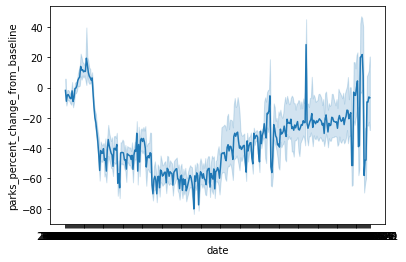

In [45]:
sns.lineplot(x='date', y='parks_percent_change_from_baseline', data=dataRM)

In [61]:
data2

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-01,-87.0,-82.0,-59.0,-75.0,-78.0,29.0
1,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-02,-62.0,-32.0,-57.0,-51.0,-36.0,20.0
2,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-03,-60.0,-35.0,-56.0,-43.0,-18.0,16.0
3,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-04,-26.0,-5.0,-34.0,-24.0,-20.0,12.0
4,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2021-01-05,-26.0,-4.0,-32.0,-24.0,-20.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24135,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-02,-7.0,13.0,-24.0,13.0,18.0,7.0
24136,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-03,-3.0,13.0,-16.0,8.0,16.0,8.0
24137,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-04,-2.0,11.0,-25.0,3.0,3.0,7.0
24138,CL,Chile,Valparaíso,Valparaíso Province,NaN,NaN,NaN,ChIJ_8SDfJJuYpYRt810yECat60,2021-12-05,-7.0,9.0,-29.0,-4.0,4.0,7.0


In [62]:
data2RM = data2[data2['sub_region_1'] == 'Santiago Metropolitan Region']
data2RM

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
17680,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2021-01-01,-89.0,-83.0,-69.0,-78.0,-82.0,32.0
17681,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2021-01-02,-67.0,-33.0,-58.0,-52.0,-40.0,22.0
17682,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2021-01-03,-64.0,-33.0,-55.0,-43.0,-22.0,17.0
17683,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2021-01-04,-22.0,0.0,-20.0,-25.0,-24.0,13.0
17684,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2021-01-05,-23.0,1.0,-24.0,-25.0,-25.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20055,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-02,31.0,38.0,14.0,-4.0,20.0,8.0
20056,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-03,35.0,42.0,12.0,28.0,20.0,9.0
20057,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-04,13.0,28.0,8.0,-6.0,16.0,6.0
20058,CL,Chile,Santiago Metropolitan Region,Talagante Province,NaN,NaN,NaN,ChIJv825d6jjYpYREU_tQqXBG8M,2021-12-05,9.0,34.0,2.0,-32.0,11.0,6.0


In [63]:
data2RM = data2RM.drop(["metro_area","iso_3166_2_code","census_fips_code","place_id",
                      "retail_and_recreation_percent_change_from_baseline",
                      "grocery_and_pharmacy_percent_change_from_baseline",
                      "transit_stations_percent_change_from_baseline",
                      "workplaces_percent_change_from_baseline",
                      "residential_percent_change_from_baseline"], axis=1)

In [64]:
data2RM

,country_region_code,country_region,sub_region_1,sub_region_2,date,parks_percent_change_from_baseline
17680,CL,Chile,Santiago Metropolitan Region,NaN,2021-01-01,-69.0
17681,CL,Chile,Santiago Metropolitan Region,NaN,2021-01-02,-58.0
17682,CL,Chile,Santiago Metropolitan Region,NaN,2021-01-03,-55.0
17683,CL,Chile,Santiago Metropolitan Region,NaN,2021-01-04,-20.0
17684,CL,Chile,Santiago Metropolitan Region,NaN,2021-01-05,-24.0
...,...,...,...,...,...,...
20055,CL,Chile,Santiago Metropolitan Region,Talagante Province,2021-12-02,14.0
20056,CL,Chile,Santiago Metropolitan Region,Talagante Province,2021-12-03,12.0
20057,CL,Chile,Santiago Metropolitan Region,Talagante Province,2021-12-04,8.0
20058,CL,Chile,Santiago Metropolitan Region,Talagante Province,2021-12-05,2.0


<AxesSubplot:xlabel='date', ylabel='parks_percent_change_from_baseline'>

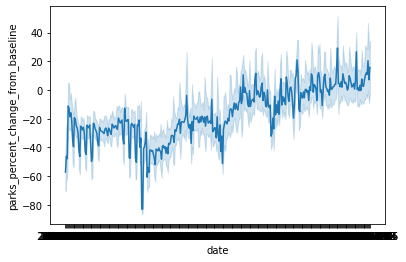

In [65]:
sns.lineplot(x='date', y='parks_percent_change_from_baseline', data=data2RM)

In [119]:
## comparando las ultimas dosgraficas, las cuales pertenencen al año 2020 y 2021 respectivamente, podemos obaservar que
## que en gran parte del tiempo los porcentajes son negativos, por lo que podemeos concluir que los parques no se visitaban más,
## por otro lado, podemos observar que en el año 2020, en cual fue el año en el que mas cuarentenas presentamos se obeserva que
## en casi todo el trancurso del año los valores son negativos, mientras que si lo comparamos con la grafica del 2021 desde la
## segunda mitad del año podenos observar como lo numeros tienenden al aumento, por lo que podriamos decir que la gente, ahora 
## que no hay mayor trestriccion, esta asisitiendo mas a plazas, parques, etc.

In [68]:
### APLE

In [109]:
data3

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,184.97,200.06,200.28,204.75,242.15,245.19,157.62,197.62,186.69,191.71
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,147.09,160.43,133.94,163.62,270.80,177.71,133.40,164.36,166.46,176.96
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.02,160.95,170.27,164.70,201.53,190.09,132.93,155.47,168.96,169.29
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,149.77,146.23,149.87,149.14,179.34,158.87,125.10,151.27,156.07,157.59


In [110]:
data3 = data3.drop(["geo_type","region","alternative_name"], axis=1)
data3

,transportation_type,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
0,driving,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,...,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58
1,walking,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,...,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65
2,driving,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,...,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74
3,walking,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,...,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15
4,driving,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,...,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,walking,Pennsylvania,United States,100.0,110.22,121.82,109.72,140.72,102.87,117.24,...,184.97,200.06,200.28,204.75,242.15,245.19,157.62,197.62,186.69,191.71
4687,driving,Texas,United States,100.0,98.85,97.76,92.21,115.79,128.73,92.48,...,147.09,160.43,133.94,163.62,270.80,177.71,133.40,164.36,166.46,176.96
4688,driving,California,United States,100.0,102.98,103.10,114.08,118.83,121.49,93.29,...,161.02,160.95,170.27,164.70,201.53,190.09,132.93,155.47,168.96,169.29
4689,driving,Arizona,United States,100.0,101.82,106.67,108.93,135.92,124.77,92.88,...,149.77,146.23,149.87,149.14,179.34,158.87,125.10,151.27,156.07,157.59


In [111]:
data3RM = data3[data3['sub-region'] == 'Santiago Metropolitan Region']
data3RM

,transportation_type,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
791,driving,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,120.69,98.55,67.72,...,101.78,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69
792,walking,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,105.57,69.28,43.79,...,97.68,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57


In [112]:
auto = data3RM[data3RM["transportation_type"] == "driving"]
caminando = data3RM[data3RM["transportation_type"] == "walking"]

In [113]:
auto

,transportation_type,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
791,driving,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,120.69,98.55,67.72,...,101.78,109.77,116.1,115.88,154.11,134.38,84.19,115.82,140.95,94.69


In [114]:
auto2 = auto.melt(id_vars=["transportation_type","sub-region","country"], var_name = "fecha", value_name = 'valor') 
auto2



,transportation_type,sub-region,country,fecha,valor
0,driving,Santiago Metropolitan Region,Chile,2020-01-13,100.00
1,driving,Santiago Metropolitan Region,Chile,2020-01-14,101.96
2,driving,Santiago Metropolitan Region,Chile,2020-01-15,105.49
3,driving,Santiago Metropolitan Region,Chile,2020-01-16,107.92
4,driving,Santiago Metropolitan Region,Chile,2020-01-17,120.69
...,...,...,...,...,...
691,driving,Santiago Metropolitan Region,Chile,2021-12-04,134.38
692,driving,Santiago Metropolitan Region,Chile,2021-12-05,84.19
693,driving,Santiago Metropolitan Region,Chile,2021-12-06,115.82
694,driving,Santiago Metropolitan Region,Chile,2021-12-07,140.95


In [115]:
caminando2 = caminando.melt(id_vars=["transportation_type","sub-region","country"], var_name = "fecha", value_name = 'valor') 
caminando2

,transportation_type,sub-region,country,fecha,valor
0,walking,Santiago Metropolitan Region,Chile,2020-01-13,100.00
1,walking,Santiago Metropolitan Region,Chile,2020-01-14,104.69
2,walking,Santiago Metropolitan Region,Chile,2020-01-15,106.20
3,walking,Santiago Metropolitan Region,Chile,2020-01-16,105.99
4,walking,Santiago Metropolitan Region,Chile,2020-01-17,105.57
...,...,...,...,...,...
691,walking,Santiago Metropolitan Region,Chile,2021-12-04,109.89
692,walking,Santiago Metropolitan Region,Chile,2021-12-05,62.87
693,walking,Santiago Metropolitan Region,Chile,2021-12-06,115.53
694,walking,Santiago Metropolitan Region,Chile,2021-12-07,132.06


In [116]:
auto2['fecha'] = pd.to_datetime(auto2['fecha'])
caminando2['fecha'] = pd.to_datetime(caminando2['fecha'])

<AxesSubplot:xlabel='fecha', ylabel='valor'>

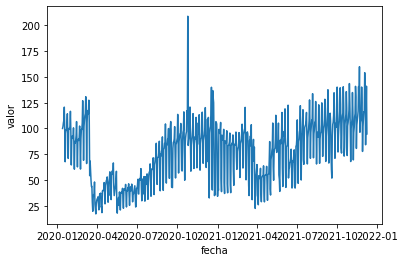

In [117]:
sns.lineplot(x="fecha", y="valor", data = auto2)

<AxesSubplot:xlabel='fecha', ylabel='valor'>

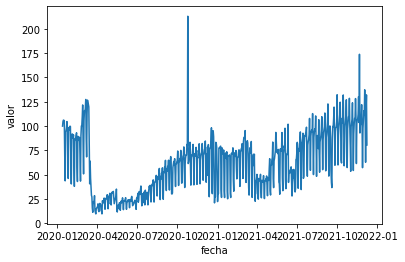

In [118]:
sns.lineplot(x="fecha", y="valor", data = caminando2)

In [120]:
# podemos obeservar que amabas graficas son muy parecidas, pero podemos notar que en la grafica de autos los valores se ubican
# mas arriba que los de caminando, por lo que podemos concluir que durante las cuarentenas y en general, durante la pandemia
# las personas usaban más el auto.